In [66]:
import pandas as pd
import numpy as np

# Data cleaning process

In [67]:
df_return = pd.read_excel('DATA.xlsx',sheet_name='RETURNS')

start_date = '2008-03-01'

# Replace the index with the Date column
df_return.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
df_return['Date'] = pd.to_datetime(df_return['Date'])
df_return.set_index('Date', inplace=True)

# Keep only values after March 2008
#df_return = df_return[df_return.index >= start_date]

df_return.head()

,ANHEUSER-BUSCH INBEV SA/NV,KONINKLIJKE AHOLD DELHAIZE N,ADIDAS AG,AIR LIQUIDE SA,AIRBUS SE,ALLIANZ SE-REG,ASML HOLDING NV,BASF SE,BAYER AG-REG,BANCO BILBAO VIZCAYA ARGENTA,...,SAFRAN SA,SANOFI,BANCO SANTANDER SA,SAP SE,SIEMENS AG-REG,SCHNEIDER ELECTRIC SE,TELEFONICA SA,TOTALENERGIES SE,VIVENDI SE,VOLKSWAGEN AG-PREF
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-31,0.054383,0.003162,0.075629,0.041231,0.010972,0.036812,0.097633,0.002335,-0.026051,0.110458,...,0.076236,0.019595,0.061884,0.100177,0.055098,0.141340,-0.011803,0.070689,-0.025699,0.091075
2006-02-28,0.000543,0.077163,-0.046946,-0.021275,-0.046203,0.020732,-0.061456,-0.024685,-0.016879,0.027679,...,-0.017479,-0.053677,0.042739,0.015130,0.025850,-0.002907,0.030260,-0.071304,-0.012797,0.219389
2006-03-31,-0.002326,-0.051172,-0.005057,0.037439,0.130364,0.017577,-0.032165,0.022768,-0.021617,0.008198,...,-0.020598,0.099439,-0.016324,0.046520,0.000520,0.039068,0.000768,0.031755,0.113553,0.047422
2006-04-28,0.045571,0.009242,0.025480,-0.001745,-0.100372,-0.036871,-0.002967,0.050386,0.107398,0.027944,...,-0.027246,-0.047770,0.019916,-0.032454,-0.026485,0.007295,-0.019305,0.006891,0.021172,-0.028490
2006-05-31,-0.061532,-0.025948,-0.067838,-0.032199,-0.092904,-0.071193,-0.060119,-0.038437,-0.017612,-0.076527,...,-0.137736,-0.016054,-0.072645,-0.045965,-0.105059,-0.075689,0.025819,-0.048478,0.002404,-0.081681


In [68]:
# Detect missing values
msg_values=df_return.isnull().sum()
print('Nombre de valeurs manquantes :\n', msg_values)

Nombre de valeurs manquantes :
 ANHEUSER-BUSCH INBEV SA/NV      0
KONINKLIJKE AHOLD DELHAIZE N    0
ADIDAS AG                       0
AIR LIQUIDE SA                  0
AIRBUS SE                       0
ALLIANZ SE-REG                  0
ASML HOLDING NV                 0
BASF SE                         0
BAYER AG-REG                    0
BANCO BILBAO VIZCAYA ARGENTA    0
BAYERISCHE MOTOREN WERKE AG     0
DANONE                          0
BNP PARIBAS                     0
CRH PLC                         0
AXA SA                          0
DEUTSCHE BOERSE AG              0
VINCI SA                        0
DEUTSCHE POST AG-REG            0
DEUTSCHE TELEKOM AG-REG         0
ESSILORLUXOTTICA                0
ENEL SPA                        0
ENGIE                           0
ENI SPA                         0
FRESENIUS SE & CO KGAA          0
SOCIETE GENERALE SA             0
IBERDROLA SA                    0
ING GROEP NV                    0
INTESA SANPAOLO                 0
INDUSTRIA DE DIS

In [69]:
# Same data cleaning process as for the RETURNS sheet
df_price_to_book = pd.read_excel('DATA.xlsx',sheet_name='PRICE TO BOOK')

# Replace the index with the Date column
df_price_to_book .rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
df_price_to_book['Date'] = pd.to_datetime(df_price_to_book['Date'])
df_price_to_book.set_index('Date', inplace=True)

# Keep only values after March 2008
#df_price_to_book = df_price_to_book[df_price_to_book.index >= start_date]

df_price_to_book.head()

,ANHEUSER-BUSCH INBEV SA/NV,KONINKLIJKE AHOLD DELHAIZE N,ADIDAS AG,AIR LIQUIDE SA,AIRBUS SE,ALLIANZ SE-REG,ASML HOLDING NV,BASF SE,BAYER AG-REG,BANCO BILBAO VIZCAYA ARGENTA,...,SAFRAN SA,SANOFI,BANCO SANTANDER SA,SAP SE,SIEMENS AG-REG,SCHNEIDER ELECTRIC SE,TELEFONICA SA,TOTALENERGIES SE,VIVENDI SE,VOLKSWAGEN AG-PREF
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-31,1.9489,2.6765,3.0258,2.9867,1.9480,1.3132,4.7849,1.9532,2.3268,3.1241,...,1.8357,2.1196,1.7517,8.2054,2.0402,1.9976,4.7757,3.7503,0.4728,0.5308
2006-02-28,2.1140,2.6849,3.2546,3.1099,1.9693,1.3615,5.2520,1.9577,2.2661,3.4432,...,1.9757,2.1611,1.8602,9.0273,2.1152,2.2800,4.7194,4.1308,0.4606,0.5792
2006-03-31,2.0716,2.8921,3.1018,3.0437,1.8784,1.3898,4.9293,1.9094,2.2279,3.5385,...,1.9411,2.0451,1.9246,9.1639,2.1698,2.2734,4.8622,3.7575,0.4547,0.7062
2006-04-28,2.1043,2.1745,2.9895,3.1576,1.9171,1.3497,4.5361,1.8654,2.0064,4.7312,...,1.9012,2.2485,1.8614,9.4695,2.1780,2.3622,5.3410,3.7332,0.5064,0.7204
2006-05-31,2.2616,2.1946,3.0657,3.1521,1.7247,1.2999,4.5226,1.9594,2.2219,4.8109,...,1.8494,2.1411,1.8985,9.1622,2.1780,2.3794,5.2379,3.9107,0.5171,0.6999


In [70]:
# Detect missing values
msg_values=df_price_to_book.isnull().sum()
print('Nombre de valeurs manquantes :\n', msg_values)

Nombre de valeurs manquantes :
 ANHEUSER-BUSCH INBEV SA/NV       0
KONINKLIJKE AHOLD DELHAIZE N     0
ADIDAS AG                        0
AIR LIQUIDE SA                   0
AIRBUS SE                        0
ALLIANZ SE-REG                   0
ASML HOLDING NV                  0
BASF SE                          0
BAYER AG-REG                     0
BANCO BILBAO VIZCAYA ARGENTA     0
BAYERISCHE MOTOREN WERKE AG      0
DANONE                           0
BNP PARIBAS                     24
CRH PLC                          0
AXA SA                           0
DEUTSCHE BOERSE AG               0
VINCI SA                         0
DEUTSCHE POST AG-REG             0
DEUTSCHE TELEKOM AG-REG          0
ESSILORLUXOTTICA                 0
ENEL SPA                         0
ENGIE                            0
ENI SPA                          0
FRESENIUS SE & CO KGAA           0
SOCIETE GENERALE SA             18
IBERDROLA SA                     0
ING GROEP NV                     0
INTESA SANPAOLO        

In [71]:
# Replace missing values with zero
df_price_to_book['BNP PARIBAS'].fillna(0, inplace=True)
df_price_to_book['SOCIETE GENERALE SA'].fillna(0, inplace=True)


# Missing values could be replaced with the average,
# but this would overperform the stock if other values are high 
# and underperform if other values are low
#df_price_to_book['BNP PARIBAS'].fillna(df_price_to_book['BNP PARIBAS'].mean(),inplace =True)
#df_price_to_book['SOCIETE GENERALE SA'].fillna(df_price_to_book['SOCIETE GENERALE SA'].mean(),inplace =True)


# Verify the cleaning process
msg_values_BNP =df_price_to_book['BNP PARIBAS'].isnull().sum()
msg_values_SG =df_price_to_book['SOCIETE GENERALE SA'].isnull().sum()
print('Nombre de valeurs manquantes :\nBNP PARIBAS ', msg_values_BNP, '\nSOCIETE GENERALE SA ', msg_values_SG)

Nombre de valeurs manquantes :
BNP PARIBAS  0 
SOCIETE GENERALE SA  0


# Scoring of stocks


In [72]:
# Function to recalculate scores (momentum, value, and global)
def recalculer_scores(df_return, month_end):
    # The momentum score, calculated as the centered standard deviation of the average monthly return 
    # over the last 12 months excluding the most recent month (to account for short-term reversions)
    momentum_score = df_return.loc[:month_end].rolling(window=12, min_periods=11).mean().shift(1).std()
    
    # Te value score, calculated as the inverse of the centered standard deviation of the price-to-book ratio 
    # measured at the end of the previous month
    inverse_pb = df_price_to_book.loc[:month_end]
    value_score = inverse_pb.std()
    
    # The global score is calculated as the mean of the momentum and value scores
    new_global_score = (momentum_score + value_score) / 2
    return new_global_score


# Stock selection

In [73]:
# Sort global scores in descending order
global_score = recalculer_scores(df_return, df_return.index[-1]) 
global_score_sorted = global_score.sort_values(ascending=False)

# The long portfolio consists of the 15 stocks with the highest global scores
long_portfolio = global_score_sorted.iloc[:15]
print(long_portfolio.head())

# The short portfolio consists of the 15 stocks with the lowest global scores
short_portfolio = global_score_sorted.iloc[-15:]
print(short_portfolio.head())

AIRBUS SE          3.667801
ASML HOLDING NV    3.025576
KERING             1.074022
ADIDAS AG          1.060257
NOKIA OYJ          0.867950
dtype: float64
CRH PLC                        0.220155
INTESA SANPAOLO                0.210678
SIEMENS AG-REG                 0.209211
BAYERISCHE MOTOREN WERKE AG    0.197114
SOCIETE GENERALE SA            0.195037
dtype: float64


# Portfolio construction

In [74]:
# Function to rebalance the portfolio monthly
def rebalance_monthly(df_return, current_weights, global_scores, current_capital):
    # Stocks are weighted proportionally to the absolute values of their global scores
    new_weights = global_scores / global_scores.sum()
    
    # Calculate monthly returns based on the current weights
    monthly_returns = (df_return.loc[month_end] * current_weights).sum()
    
    # Update the capital by applying the monthly returns
    updated_capital = current_capital * (1 + monthly_returns)
    
    return new_weights, updated_capital

In [75]:
# Initialize capital for the portfolio
capital_initial = 100000
capital_long = capital_initial / 2  # Allocate half the capital to the long portfolio
capital_short = capital_initial / 2  # Allocate half the capital to the short portfolio

# Initialize weights for the first month
long_weights = long_portfolio / long_portfolio.sum()
short_weights = short_portfolio / short_portfolio.sum()

# Initialize the performance DataFrame
performance_portfolio = pd.DataFrame(index=df_return.index)


In [76]:
# Define the start date of the strategy
strategy_start_date = '2008-03-01'

# Create a list to store the evolution of the capital over time
capital_evolution = []

for month_end in df_return.index:
    # Skip calculations for dates before the strategy start date
    if month_end < pd.to_datetime(strategy_start_date):
        continue

    # Recalculate scores
    global_scores = recalculer_scores(df_return, month_end)

    # Update long and short portfolios
    long_scores = global_scores[long_portfolio.index]
    short_scores = global_scores[short_portfolio.index]

    # Rebalance long portfolio
    long_weights, capital_long = rebalance_monthly(
        df_return[long_portfolio.index],
        long_weights,
        long_scores,
        capital_long
    )

    # Rebalance short portfolio
    short_weights, capital_short = rebalance_monthly(
        df_return[short_portfolio.index],
        short_weights,
        short_scores,
        capital_short
    )


    # Calculate net capital : 
    # This simulates the liquidation of the portfolio:
    # we sell the long positions and buy back the short positions to close them.
    net_capital = capital_long - capital_short   
    capital_evolution.append((month_end, net_capital))



              Net Capital
Date                     
2008-03-31   -1425.837019
2008-04-30   -5295.536567
2008-05-30   -3219.968715
2008-06-30   -3080.130640
2008-07-31   -3569.007505
...                   ...
2022-11-30   87334.227087
2022-12-30   79430.110241
2023-01-31   87035.098641
2023-02-28   83853.868362
2023-03-31  101310.061086

[181 rows x 1 columns]


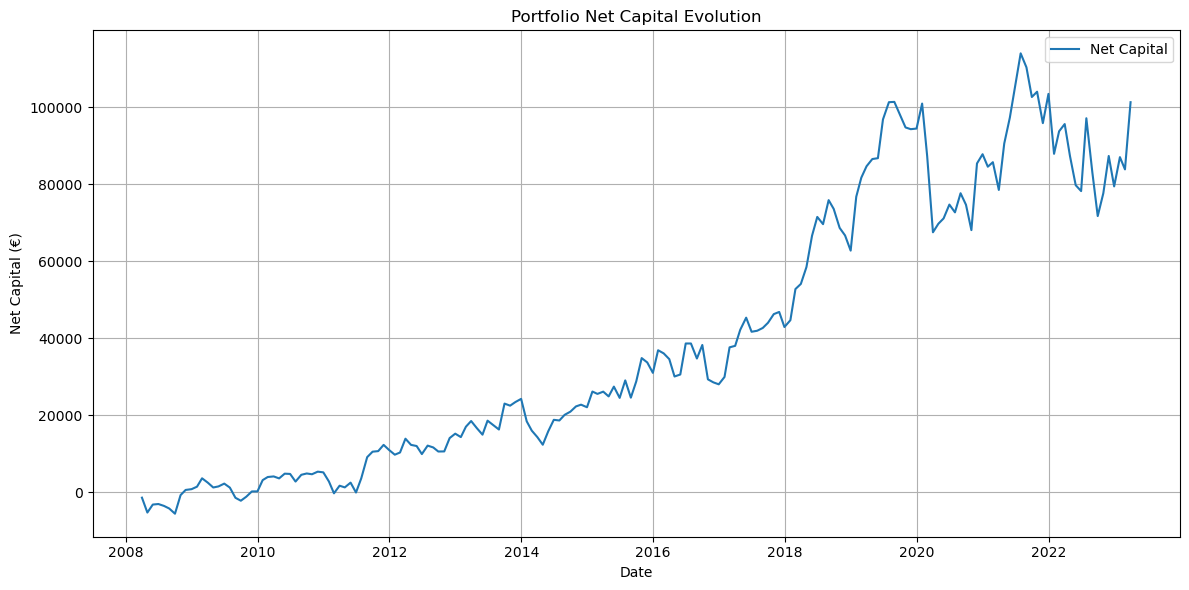

In [77]:
# Convert capital evolution to a DataFrame
capital_evolution_df = pd.DataFrame(capital_evolution, columns=["Date", "Net Capital"])
capital_evolution_df.set_index("Date", inplace=True)

# Display the capital evolution
print(capital_evolution_df)

# Plot the capital evolution of the portfolio
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(capital_evolution_df.index, capital_evolution_df["Net Capital"], label="Net Capital")
plt.title("Portfolio Net Capital Evolution")
plt.xlabel("Date")
plt.ylabel("Net Capital (€)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [78]:
# Adjust net capital to start at 100,000
capital_evolution_df["Net Capital"] += 100000

# Display the capital evolution
print(capital_evolution_df)

# Calculate initial and final capital
initial_capital = 100000  # Initial investment capital
final_capital = capital_evolution_df["Net Capital"].iloc[-1]  # Final capital at the end of the period

# Display initial and final capital
print(f"Initial Capital: €{initial_capital:.2f}")
print(f"Final Capital: €{final_capital:.2f}")

# Calculate profitability
profitability = (final_capital - initial_capital) / initial_capital * 100

# Display profitability
print(f"Profitability of the Long/Short Strategy: {profitability:.2f}%")

              Net Capital
Date                     
2008-03-31   98574.162981
2008-04-30   94704.463433
2008-05-30   96780.031285
2008-06-30   96919.869360
2008-07-31   96430.992495
...                   ...
2022-11-30  187334.227087
2022-12-30  179430.110241
2023-01-31  187035.098641
2023-02-28  183853.868362
2023-03-31  201310.061086

[181 rows x 1 columns]
Initial Capital: €100000.00
Final Capital: €201310.06
Profitability of the Long/Short Strategy: 101.31%


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


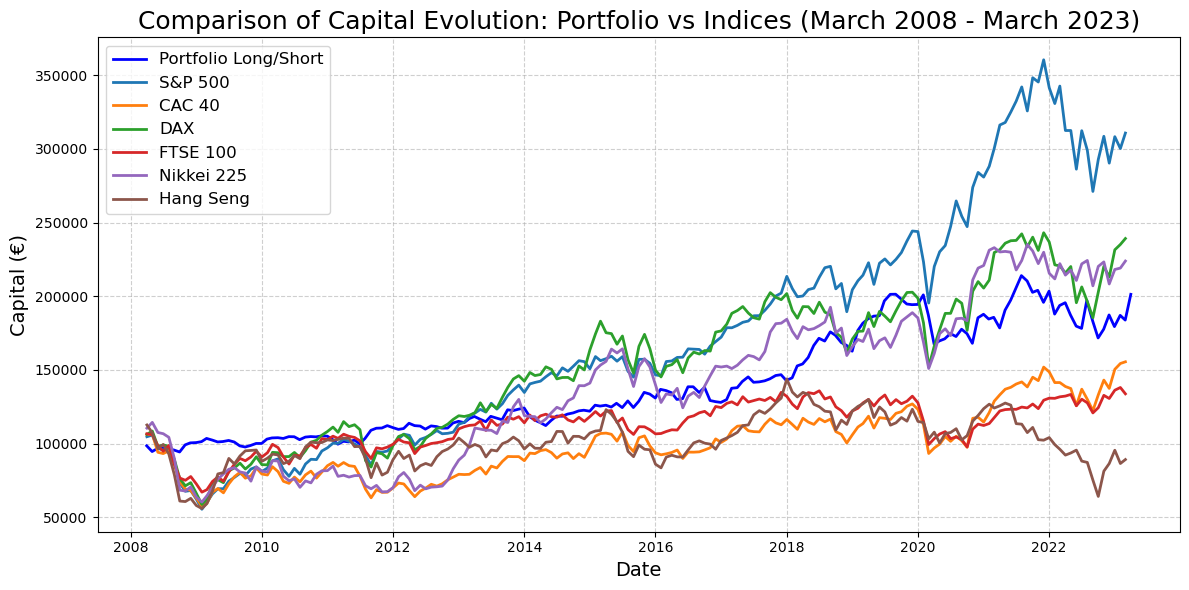

In [79]:
import yfinance as yf


# In this section, we compare the performance of our strategy to investing the same amount 
# (100,000 euros) in well-known indices.

indices = {
    "S&P 500": "^GSPC",
    "CAC 40": "^FCHI",
    "DAX": "^GDAXI",
    "FTSE 100": "^FTSE",
    "Nikkei 225": "^N225",
    "Hang Seng": "^HSI"
}


index_capitals = {}

# Download data and calculate capital evolution for each index
for name, ticker in indices.items():
    try:
        index_data = yf.download(ticker, start='2008-03-01', end='2023-03-31', interval='1mo')
        index_data['Monthly Return'] = index_data['Adj Close'].pct_change()
        # Capital evolution starting from the same initial capital as the portfolio
        index_capitals[name] = capital_initial * (1 + index_data['Monthly Return']).cumprod()
    except Exception as e:
        print(f"Error fetching data for {name}: {e}")

# Taux de change pour convertir les indices en EUR
exchange_rates = {
    "USD": "EURUSD=X",
    "GBP": "EURGBP=X",
    "JPY": "EURJPY=X",
    "HKD": "EURHKD=X"
}


# Plot the capital evolution
plt.figure(figsize=(12, 6))
plt.plot(capital_evolution_df.index, capital_evolution_df["Net Capital"], label="Portfolio Long/Short", linewidth=2, color='blue')

# Add indices to the plot
for name, capital in index_capitals.items():
    plt.plot(capital.index, capital, label=name, linewidth=2)

plt.title('Comparison of Capital Evolution: Portfolio vs Indices (March 2008 - March 2023)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Capital (€)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()
